In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras import models, layers
from keras import Sequential
from keras.layers import Dense, Input, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import re
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from pandas import read_csv
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import tensorflow as tf
from keras import backend as K
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
from keras import backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras.utils
from keras import utils as np_utils
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df = pd.get_dummies(df, columns=["Department", 'salary'], drop_first=True)

In [3]:
X = df.loc[:, df.columns != 'left']
y = df.loc[:, df.columns == 'left']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [4]:
def score(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_matrix_ = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc = roc_auc_score(y_test, y_pred)
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1,  'confusion_matrix': confusion_matrix_, 'roc_auc': roc_auc}


In [5]:
def roc_curve_display(y_test, y_pred):
    RocCurveDisplay.from_predictions(y_test, y_pred)

In [ ]:
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units_1', 100, 500, 25, default=2),
                activation=hp.Choice(
                    'dense_activation_1',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape,
                kernel_initializer='zeros', bias_initializer='zeros'
            )
        )
        model.add(
            Dropout(
                hp.Float(
                    'dropout_1',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.005,
                    step=0.01)
            )
        )
        model.add(
            Dense(
                units=hp.Int('units_2', 100, 500, 25, default=2),
                activation=hp.Choice(
                    'dense_activation_2',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu')
            )
        )
        model.add(
            Dropout(
                hp.Float(
                    'dropout_2',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.005,
                    step=0.01)
            )
        )

        model.add(layers.Dense(2, activation='softmax',
                  kernel_initializer='zeros', bias_initializer='zeros'))
        model.compile(
            optimizer='adam',
            loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
        )

        return model


In [ ]:
input_shape = (X_train.shape[1],)
hypermodel = RegressionHyperModel(input_shape)

In [ ]:
tuner_rs = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    seed=42,
    max_trials=200,
    executions_per_trial=1, overwrite=True
)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)
tuner_rs.search(x_train_scaled, y_train, epochs=50,validation_split=0.2, verbose=0)


INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner_rs.get_best_models()[0]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 475)               9025      
                                                                 
 dropout (Dropout)           (None, 475)               0         
                                                                 
 dense_1 (Dense)             (None, 375)               178500    
                                                                 
 dropout_1 (Dropout)         (None, 375)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 752       
                                                                 
Total params: 188,277
Trainable params: 188,277
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner_rs.results_summary()


Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 475
dense_activation_1: tanh
dropout_1: 0.03
units_2: 375
dense_activation_2: sigmoid
dropout_2: 0.1
Score: 0.9745833277702332
Trial summary
Hyperparameters:
units_1: 450
dense_activation_1: tanh
dropout_1: 0.15
units_2: 375
dense_activation_2: sigmoid
dropout_2: 0.12
Score: 0.9729166626930237
Trial summary
Hyperparameters:
units_1: 425
dense_activation_1: tanh
dropout_1: 0.31
units_2: 375
dense_activation_2: sigmoid
dropout_2: 0.13
Score: 0.9712499976158142
Trial summary
Hyperparameters:
units_1: 500
dense_activation_1: tanh
dropout_1: 0.21
units_2: 475
dense_activation_2: sigmoid
dropout_2: 0.33
Score: 0.9712499976158142
Trial summary
Hyperparameters:
units_1: 400
dense_activation_1: sigmoid
dropout_1: 0.07
units_2: 350
dense_activation_2: tanh
dropout_2: 0.27
Score: 0.9704166650772095
Trial summary
Hyperparameters:
units_1: 375
dense_activation_1: sigmoid
dropout_1: 0.02
unit

In [ ]:
'''
Trial summary
Hyperparameters:
units_1: 475
dense_activation_1: tanh
dropout_1: 0.03
units_2: 375
dense_activation_2: sigmoid
dropout_2: 0.1
Score: 0.9745833277702332

'''

In [14]:
from pandas import read_csv
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


def baseline_model():
    model = Sequential()
    model.add(Dense(475, activation='tanh', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.03))
    model.add(Dense(375, activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax',
                kernel_initializer='zeros', bias_initializer='zeros'))
    model.compile(optimizer='adam',
                    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True))
    return model


df = pd.read_csv('HR_comma_sep.csv')
df = pd.get_dummies(df, columns=["Department", 'salary'], drop_first=True)

X = df.loc[:, df.columns != 'left']
y = df.loc[:, df.columns == 'left']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

estimator = KerasClassifier(build_fn=baseline_model, epochs=124, verbose=0)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score(y_test, y_pred)


94/94 [==============================] - 0s 2ms/step


{'accuracy': 0.9523333333333334,
 'precision': 0.9607201309328969,
 'recall': 0.8314447592067988,
 'f1': 0.891419893697798,
 'confusion_matrix': array([[2270,   24],
        [ 119,  587]], dtype=int64),
 'roc_auc': 0.9104913421142974}

In [15]:
def baseline_model():
    model = Sequential()
    model.add(Dense(475, activation='tanh', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.03))
    model.add(Dense(375, activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax',
                kernel_initializer='zeros', bias_initializer='zeros'))
    model.compile(optimizer='adam',
                    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True))
    return model


df = pd.read_csv('HR_comma_sep.csv')
df = pd.get_dummies(df, columns=["Department", 'salary'], drop_first=True)

X = df.loc[:, df.columns != 'left']
y = df.loc[:, df.columns == 'left']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=70)

estimator = KerasClassifier(build_fn=baseline_model, epochs=124, verbose=0)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score(y_test, y_pred)

94/94 [==============================] - 0s 2ms/step


{'accuracy': 0.9426666666666667,
 'precision': 0.8558322411533421,
 'recall': 0.9132867132867133,
 'f1': 0.8836265223274696,
 'confusion_matrix': array([[2175,  110],
        [  62,  653]], dtype=int64),
 'roc_auc': 0.9325733347615186}

In [16]:
def baseline_model():
    model = Sequential()
    model.add(Dense(475, activation='tanh', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.03))
    model.add(Dense(375, activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax',
                kernel_initializer='zeros', bias_initializer='zeros'))
    model.compile(optimizer='adam',
                    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True))
    return model


df = pd.read_csv('HR_comma_sep.csv')
df = pd.get_dummies(df, columns=["Department", 'salary'], drop_first=True)

X = df.loc[:, df.columns != 'left']
y = df.loc[:, df.columns == 'left']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=30)

estimator = KerasClassifier(build_fn=baseline_model, epochs=124, verbose=0)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score(y_test, y_pred)

94/94 [==============================] - 0s 1ms/step


{'accuracy': 0.951,
 'precision': 0.883289124668435,
 'recall': 0.9186206896551724,
 'f1': 0.9006085192697769,
 'confusion_matrix': array([[2187,   88],
        [  59,  666]], dtype=int64),
 'roc_auc': 0.9399696854869268}

In [17]:
def baseline_model():
    model = Sequential()
    model.add(Dense(475, activation='tanh', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.03))
    model.add(Dense(375, activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax',
                kernel_initializer='zeros', bias_initializer='zeros'))
    model.compile(optimizer='adam',
                    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True))
    return model


df = pd.read_csv('HR_comma_sep.csv')
df = pd.get_dummies(df, columns=["Department", 'salary'], drop_first=True)

X = df.loc[:, df.columns != 'left']
y = df.loc[:, df.columns == 'left']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)

estimator = KerasClassifier(build_fn=baseline_model, epochs=124, verbose=0)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score(y_test, y_pred)

94/94 [==============================] - 0s 2ms/step


{'accuracy': 0.949,
 'precision': 0.9029126213592233,
 'recall': 0.8869209809264306,
 'f1': 0.8948453608247422,
 'confusion_matrix': array([[2196,   70],
        [  83,  651]], dtype=int64),
 'roc_auc': 0.9280147711340009}

In [18]:
def baseline_model():
    model = Sequential()
    model.add(Dense(475, activation='tanh', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.03))
    model.add(Dense(375, activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax',
                kernel_initializer='zeros', bias_initializer='zeros'))
    model.compile(optimizer='adam',
                    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True))
    return model


df = pd.read_csv('HR_comma_sep.csv')
df = pd.get_dummies(df, columns=["Department", 'salary'], drop_first=True)

X = df.loc[:, df.columns != 'left']
y = df.loc[:, df.columns == 'left']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

estimator = KerasClassifier(build_fn=baseline_model, epochs=124, verbose=0)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
score(y_test, y_pred)

94/94 [==============================] - 0s 1ms/step


{'accuracy': 0.957,
 'precision': 0.9397590361445783,
 'recall': 0.8751753155680224,
 'f1': 0.906318082788671,
 'confusion_matrix': array([[2247,   40],
        [  89,  624]], dtype=int64),
 'roc_auc': 0.9288425768920129}

In [7]:
def baseline_model():
    model = Sequential()
    model.add(Dense(475, activation='tanh', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.03))
    model.add(Dense(375, activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax',
                kernel_initializer='zeros', bias_initializer='zeros'))
    model.compile(optimizer='adam',
                    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True))
    return model


df = pd.read_csv('HR_comma_sep.csv')
df = pd.get_dummies(df, columns=["Department", 'salary'], drop_first=True)

X = df.loc[:, df.columns != 'left']
y = df.loc[:, df.columns == 'left']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

scoring = {'accuracy': 'accuracy',
           'f1': 'f1',
           'precision': 'precision',
           'recall':'recall',
           'roc_auc':'roc_auc'}

estimator = KerasClassifier(build_fn=baseline_model, epochs=124, verbose=0)
kfold = KFold(n_splits=5)
results = cross_validate(estimator, X_train, y_train,
                          cv=kfold, scoring=scoring) 
results

75/75 [==============================] - 0s 2ms/step


{'fit_time': array([126.89100885, 139.82151365, 155.86689115, 149.95587873,
        114.5321455 ]),
 'score_time': array([0.42167306, 0.42329049, 0.45322657, 0.40890694, 0.4270134 ]),
 'test_accuracy': array([0.94958333, 0.95666667, 0.94791667, 0.94083333, 0.94372655]),
 'test_f1': array([0.89891395, 0.90647482, 0.88748875, 0.86527514, 0.88021295]),
 'test_precision': array([0.89966555, 0.91304348, 0.91977612, 0.95597484, 0.85517241]),
 'test_recall': array([0.89816361, 0.9       , 0.8573913 , 0.79029463, 0.90676417]),
 'test_roc_auc': array([0.9733157 , 0.97806871, 0.97534437, 0.98194265, 0.97519851])}

In [19]:
res = {
    'logistic reg': {'accuracy': 0.7843333333333333,
 'precision': 0.5710843373493976,
 'recall': 0.3356940509915014,
 'f1': 0.42283675289919714,
 'roc_auc': 0.6290501641182442},
 'DecisionTreeClassifier':{'accuracy': 0.978,
 'precision': 0.9584527220630372,
 'recall': 0.9475920679886686,
 'f1': 0.9529914529914529,
 'roc_auc': 0.967475197028336},
 'KNeighborsClassifier':{'accuracy': 0.978,
 'precision': 0.9584527220630372,
 'recall': 0.9475920679886686,
 'f1': 0.9529914529914529,
 'roc_auc': 0.967475197028336},
 'SVC':{'accuracy': 0.939,
 'precision': 0.8944193061840121,
 'recall': 0.839943342776204,
 'f1': 0.8663257852447042,
 'roc_auc': 0.9047144787115544},
 'RandomForestClassifier':{'accuracy': 0.9883333333333333,
 'precision': 0.9883551673944687,
 'recall': 0.9617563739376771,
 'f1': 0.9748743718592964,
 'roc_auc': 0.9791345078058045},
 'XGBClassifier':{'accuracy': 0.9883333333333333,
 'precision': 0.9883551673944687,
 'recall': 0.9617563739376771,
 'f1': 0.9748743718592964,
 'roc_auc': 0.9791345078058045},
 'CatBoostClassifier':{'accuracy': 0.9883333333333333,
 'precision': 0.9883551673944687,
 'recall': 0.9617563739376771,
 'f1': 0.9748743718592964,
 'roc_auc': 0.9791345078058045},
 'LGBMClassifier':{'accuracy': 0.9883333333333333,
 'precision': 0.9883551673944687,
 'recall': 0.9617563739376771,
 'f1': 0.9748743718592964,
 'roc_auc': 0.9791345078058045},
 'DNN':{'accuracy': 0.957,
 'precision': 0.9397590361445783,
 'recall': 0.8751753155680224,
 'f1': 0.906318082788671,
 'roc_auc': 0.9288425768920129}
}

In [20]:
import plotly.express as px
scores = pd.DataFrame(res).transpose()
fig = px.bar(scores)
fig.show()


In [3]:
def baseline_model():
    model = Sequential()
    model.add(Dense(475, activation='tanh'))
    model.add(Dropout(0.03))
    model.add(Dense(375, activation='sigmoid'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax',
                kernel_initializer='zeros', bias_initializer='zeros'))
    model.compile(optimizer='adam',
                    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model


df = pd.read_csv('HR_comma_sep.csv')
df = pd.get_dummies(df, columns=["Department", 'salary'], drop_first=True)

X = df.loc[:, df.columns != 'left']
y = df.loc[:, df.columns == 'left']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

estimator = KerasClassifier(build_fn=baseline_model, epochs=124, verbose=0)
estimator.fit(X_train, y_train)

375/375 [==============================] - 1s 2ms/step


<AxesSubplot:ylabel='Feature'>

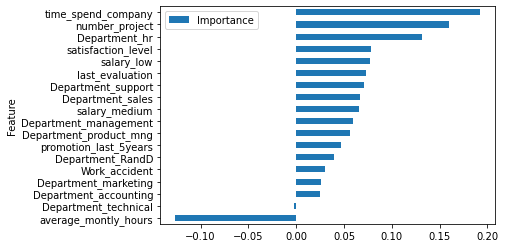

In [72]:
from rfpimp import dropcol_importances
from sklearn.metrics import r2_score
def custom_regression_r2_score(model, X, y, sample_weights):
    y_pred = model.predict(X)
    oob_score = r2_score(y, y_pred)
    return oob_score
drop_importance = dropcol_importances(
    estimator, 
    X_train, 
    y_train, 
    None, 
    None, 
    custom_regression_r2_score)
drop_importance.sort_values(
    by=['Importance']).plot.barh(y='Importance')

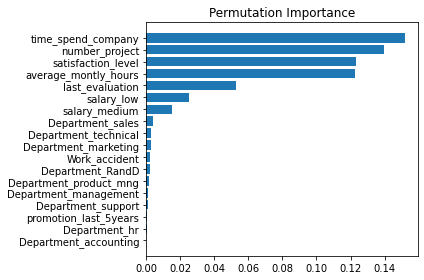

In [25]:
from sklearn.inspection import permutation_importance
result = permutation_importance(estimator, X_train, y_train, n_repeats=10,
                               random_state=0)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.barh(X_test.columns[sorted_idx], result.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()                        

In [56]:
from sklearn.linear_model import LogisticRegression
lr = make_pipeline(
    StandardScaler(),
    GridSearchCV(LogisticRegression(),
                 param_grid={
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        "fit_intercept": [True, False],
        'C': np.arange(0, 3, 0.1)
    },
        cv=5,
        refit=True))

lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9]),
                                          'fit_intercept': [True, False],
                                          'penalty': ['l1', 'l2', 'elasticnet',
                                                      'none']}))])

In [57]:
lr.get_params()['gridsearchcv'].best_params_

{'C': 1.0, 'fit_intercept': True, 'penalty': 'l2'}

In [59]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(C= 1.0, fit_intercept= True, penalty='l2'))
pipe.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [61]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",pipe.named_steps['logisticregression'].coef_.transpose())
coef_table.sort_values(by='Coefs', ascending=False)

0     Coefs
16              salary_low  0.990147
17           salary_medium  0.721742
4       time_spend_company  0.391618
3     average_montly_hours  0.207154
1          last_evaluation  0.108772
9            Department_hr  0.091390
15    Department_technical  0.085156
14      Department_support  0.072918
13        Department_sales  0.060861
11    Department_marketing  0.029637
8    Department_accounting  0.023890
12  Department_product_mng  0.013909
10   Department_management -0.057520
7         Department_RandD -0.089871
6    promotion_last_5years -0.203468
2           number_project -0.379940
5            Work_accident -0.522218
0       satisfaction_level -1.036501

In [42]:
import xgboost as xgb
xgbc = make_pipeline(
    StandardScaler(),
    GridSearchCV(xgb.XGBClassifier(),
                 param_grid={
        'max_depth': [5, 10, 20, 50],
        'max_features': ['sqrt', 'log2', None]
    },
        cv=5,
        refit=True))

xgbc.fit(X_train, y_train)
xgbc.get_params()['gridsearchcv'].best_params_

[07:26:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:26:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[07:26:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  Thi

{'max_depth': 10, 'max_features': 'sqrt'}

In [43]:
xgbc.get_params()['gridsearchcv'].best_params_

{'max_depth': 10, 'max_features': 'sqrt'}

In [44]:
pipe = make_pipeline(StandardScaler(), xgb.XGBClassifier(max_depth= 10, max_features='sqrt'))
pipe.fit(X_train, y_train.values.ravel())

[07:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=10, max_features='sqrt', max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, ...))])

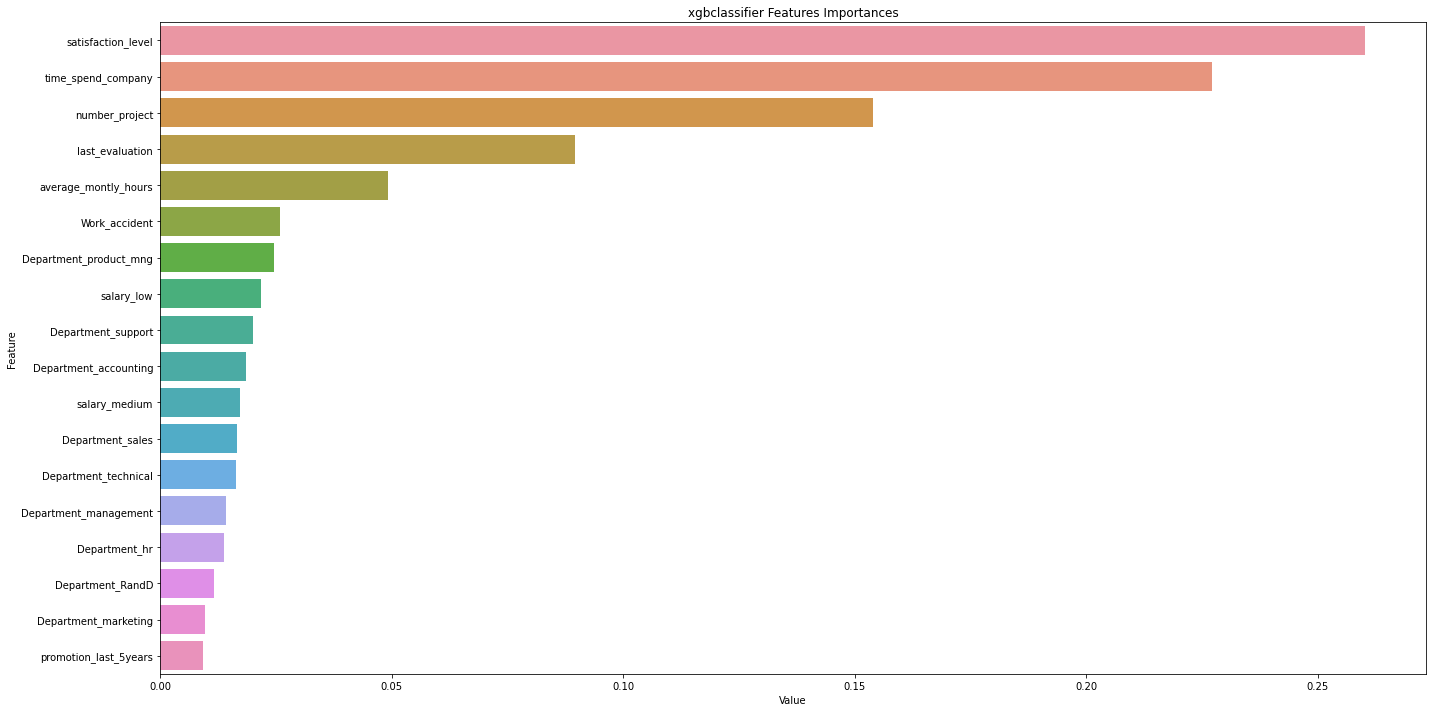

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
feature_imp = pd.DataFrame(sorted(zip(pipe['xgbclassifier'].feature_importances_,X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('xgbclassifier Features Importances')
plt.tight_layout()
plt.show()

In [70]:
def prob(data):
    return np.array(list(zip(1-estimator.predict(data),estimator.predict(data))))
    


explainer = lime.lime_tabular.LimeTabularExplainer(df[list(X_train.columns)].astype(int).values,  
mode='classification',training_labels=df['left'],feature_names=list(X_train.columns))


# asking for explanation for LIME model

exp = explainer.explain_instance(df.loc[5,list(X_train.columns)].astype(int).values, prob, num_features=5)

exp.show_in_notebook()

157/157 [==============================] - 0s 2ms/step


In [71]:
def prob(data):
    return np.array(list(zip(1-estimator.predict(data),estimator.predict(data))))
    


explainer = lime.lime_tabular.LimeTabularExplainer(df[list(X_train.columns)].astype(int).values,  
mode='classification',training_labels=df['left'],feature_names=list(X_train.columns))


# asking for explanation for LIME model

exp = explainer.explain_instance(df.loc[6,list(X_train.columns)].astype(int).values, prob, num_features=5)

exp.show_in_notebook()

157/157 [==============================] - 0s 2ms/step


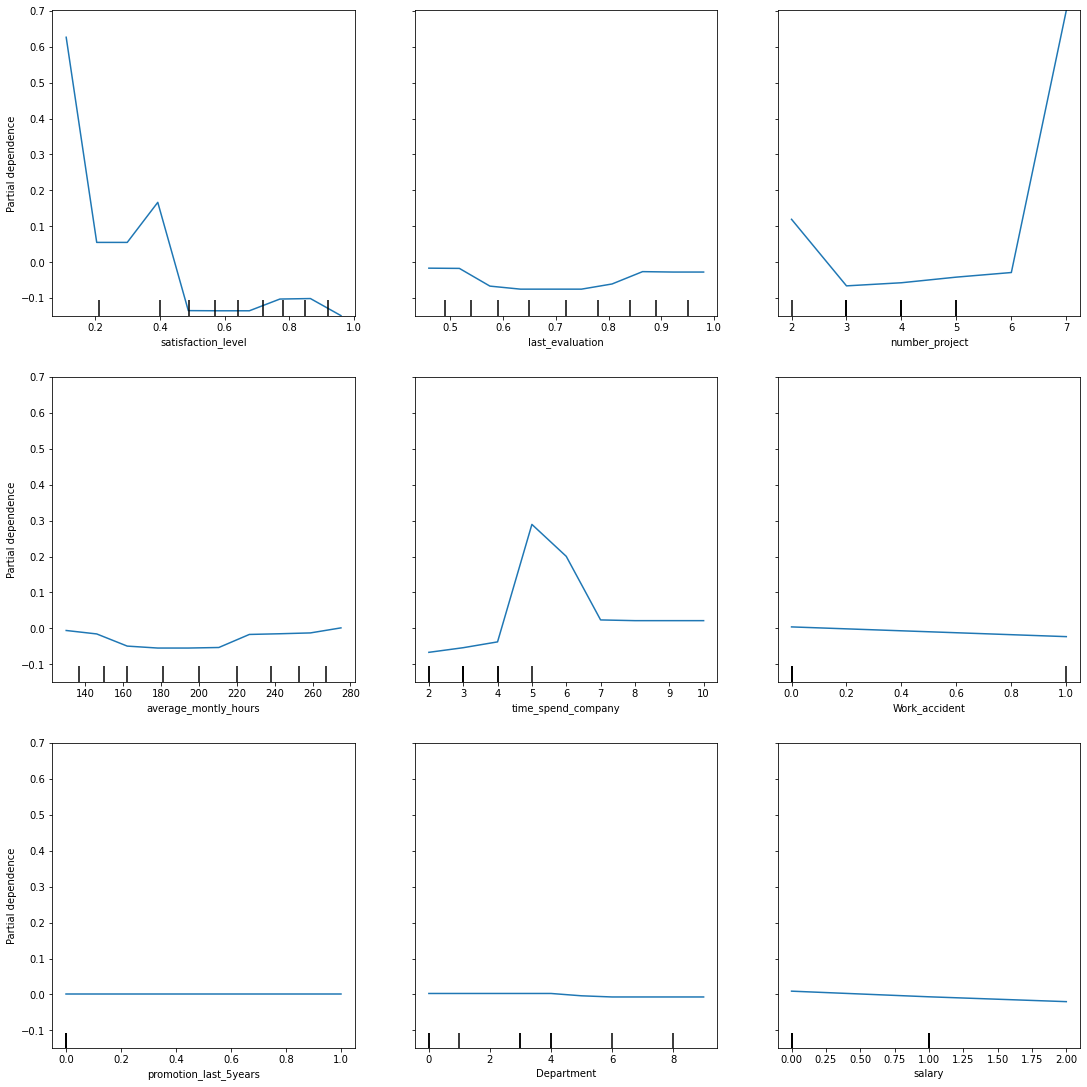

In [27]:
from matplotlib.pyplot import figure
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.inspection import partial_dependence, plot_partial_dependence


df = pd.read_csv('HR_comma_sep.csv')
mapping_department = {'sales': 0, 'accounting': 1, 'hr': 2, 'technical': 3,
                      'support': 4, 'management': 5, 'IT': 6, 'product_mng': 7, 'marketing': 8, 'RandD': 9}
df.replace(mapping_department, inplace=True)
mapping_salary = {'low': 0, 'medium': 1, 'high': 2}
df.replace(mapping_salary, inplace=True)
X = df.loc[:, df.columns != 'left']
y = df.loc[:, df.columns == 'left']

cols_to_use = X.columns


fig, ax = plt.subplots(figsize=(15, 15))
fig.tight_layout()

my_model = GradientBoostingRegressor()
my_model.fit(X, y)
my_plots = plot_partial_dependence(my_model,
                                   features=[i for i in range(len(X.columns))],
                                   X=X,
                                   feature_names=cols_to_use,
                                   grid_resolution=10,
                                   ax=ax)
